In [21]:
library(ggpubr)
library(gridExtra)
library(tidyverse)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [1]:
#args = commandArgs(trailingOnly=TRUE)
args <- readLines("coverage-plots.txt")
args

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Europe/Brussels’ (or equivalent)”
── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    mas

[1] "MEMO005" "MEMO078" "NEMO46"  "MEMO141" "NEMO42"  "MEMO085" "MEMO073"
 [8] "NEMO35"  "MEMO108" "MEMO139" "MEMO057" "MEMO056" "MEMO105" "MEMO129"
[15] "MEMO100" "MEMO043"

In [2]:
#df_merged <- read.table(paste0("bowtie/",args[1],".bowtie.depth"), header = T)
phageblast <- read.table("phage_blast.tsv", header=F, sep="\t")
phageblast <- phageblast[phageblast$V4 > 2000,]

rRNA <- data.frame(name=c("16S", "23S", "5S"),
  start=c(1136001, 1235938, 1238768),
  end=c(1137446, 1238682, 1238878)
)

prophage <- data.frame(
  name=c("p1", "p2", "p3", "p4", "p5"),
  start=c(250652, 320006, 346157, 444716, 1376656),
  end=c(266846, 337904, 360657, 483289, 1413160)
)

In [3]:
df_list <- list()

for (file in args) {
  # Read the TSV file into a data frame
  df <- read.table(paste0("bowtie/",file,".bowtie.depth"), header=TRUE, sep="\t")
  
  # Append the data frame to the list
  df_list[[file]] <- df
}

df_merged <- Reduce(function(x, y) merge(x, y, by=c("strain", "pos"), all=TRUE), df_list)

In [42]:
g <- lapply(args, function(sample) {
    
    if (max(df_list[[sample]][3])<1000){

        ggplot(df_list[[sample]], aes_string(x="pos", y=sample))+
                geom_line()+
                geom_rect(data = phageblast, inherit.aes=FALSE, aes(xmin=V9, xmax=V10, ymin=-max(df_list[[sample]][3])*0.066, ymax=-max(df_list[[sample]][3])*0.043,
                                                                  fill="#3977AF", color="#3977AF"), alpha=1)+
                geom_rect(data = rRNA, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_list[[sample]][3])*0.036, ymax=-max(df_list[[sample]][3])*0.012,
                                                                  fill="red", color="red"), alpha=1)+
                geom_rect(data = prophage, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_list[[sample]][3])*0.036, ymax=-max(df_list[[sample]][3])*0.012,
                                                                    fill="limegreen", color="limegreen"), alpha=1)+
                labs(x="Nucleotide position", y="Read depth")+
                ggtitle(sample)+
                scale_fill_identity(name = "",
                                    breaks = c("#3977AF", "limegreen", "red"),
                                    labels = c("phageWO prophage region (BLASTn)", "prophage regions (Genbank)", "rRNA genes"),
                                    guide = "legend")+
                scale_color_identity(name = "",
                                    #breaks = c("#3977AF", "red"),
                                    #labels = c("phageWO prophage region", "rRNA genes"),
                                    guide = "none",#"legend"
                                    )+
                theme_bw()+
                theme(legend.position = "top", 
                      legend.background=element_rect(fill=NA, color=NA),
                      legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit='cm'),
                      legend.key.size = unit(3, 'mm'),
                      plot.title = element_text(size=9, face="bold"),
                      aspect.ratio=5/7.5,
                      #panel.grid.major = element_line(size = .25),
                      panel.grid=element_blank())+
                guides(fill = guide_legend(override.aes = list(alpha = 1)))
        }
    else {
        ggplot(df_list[[sample]], aes_string(x="pos", y=sample))+
                    geom_line()+
                    geom_rect(data = phageblast, inherit.aes=FALSE, aes(xmin=V9, xmax=V10, ymin=-1000*0.066, ymax=-1000*0.043,
                                                                      fill="#3977AF", color="#3977AF"), alpha=1)+
                    geom_rect(data = rRNA, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-1000*0.036, ymax=-1000*0.012,
                                                                      fill="red", color="red"), alpha=1)+
                    geom_rect(data = prophage, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-1000*0.036, ymax=-1000*0.012,
                                                                        fill="limegreen", color="limegreen"), alpha=1)+
                    labs(x="Nucleotide position", y="Read depth")+
                    ggtitle(sample)+
                    scale_fill_identity(name = "",
                                        breaks = c("#3977AF", "limegreen", "red"),
                                        labels = c("phageWO prophage region (BLASTn)", "prophage regions (Genbank)", "rRNA genes"),
                                        guide = "legend")+
                    scale_color_identity(name = "",
                                        #breaks = c("#3977AF", "red"),
                                        #labels = c("phageWO prophage region", "rRNA genes"),
                                        guide = "none",#"legend"
                                        )+
                    scale_y_continuous(limits=c(NA,1000))+
                    theme_bw()+
                    theme(legend.position = "top", 
                          legend.background=element_rect(fill=NA, color=NA),
                          legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit='cm'),
                          legend.key.size = unit(3, 'mm'),
                          plot.title = element_text(size=9, face="bold"),
                          aspect.ratio=5/7.5,
                          #panel.grid.major = element_line(size = .25),
                          panel.grid=element_blank())+
                    guides(fill = guide_legend(override.aes = list(alpha = 1)))
        }
    })

In [43]:
p <- ggarrange(plotlist = g, ncol = 4, nrow=4, common.legend=T)

In [45]:
ggsave(file="test.png", plot=p, dpi=300, height=10, width=15)

--------

In [ ]:
plotlist <- list()
count <- 0
max <- c()
for (sample in args){
    count <- count+1
    max[[count]] <- max(df_list[[sample]][3])

    plotlist[[sample]] <- ggplot(df_list[[sample]], aes_string(x="pos", y=sample))+
        geom_line()+
        geom_rect(data = phageblast, inherit.aes=FALSE, aes(xmin=V9, xmax=V10, ymin=-max[[count]]*0.066, ymax=-max[[count]]*0.043,
                                                          fill="#3977AF", color="#3977AF"), alpha=1)+
        geom_rect(data = rRNA, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max[[count]]*0.036, ymax=-max[[count]]*0.012,
                                                          fill="red", color="red"), alpha=1)+
        geom_rect(data = prophage, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max[[count]]*0.036, ymax=-max[[count]]*0.012),
                                                            fill="limegreen", color="limegreen"), alpha=1)+
        labs(x="Nucleotide position", y="Read depth")+
        ggtitle(sample)+
        scale_fill_identity(name = "",
                            breaks = c("#3977AF", "limegreen", "red"),
                            labels = c("phageWO prophage region (BLASTn)", "prophage regions (Genbank)", "rRNA genes"),
                            guide = "legend")+
        scale_color_identity(name = "",
                            #breaks = c("#3977AF", "red"),
                            #labels = c("phageWO prophage region", "rRNA genes"),
                            guide = "none",#"legend"
                            )+
        theme_bw()+
        theme(legend.position = "top", 
              legend.background=element_rect(fill=NA, color=NA),
              legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit='cm'),
              legend.key.size = unit(3, 'mm'),
              plot.title = element_text(size=9, face="bold"),
              aspect.ratio=5/7.5,
              #panel.grid.major = element_line(size = .25),
              panel.grid=element_blank())+
        guides(fill = guide_legend(override.aes = list(alpha = 1)))
}

In [ ]:
for (sample in args) {
    ggsave(paste0(sample,"-covplot.pdf"), plotlist[[sample]], dpi=300, width = 7.5, height=5)
}

In [ ]:
for (sample in args) {
    print(max(df_list[[sample]][3]))
}

In [10]:
for (file in args) {
    df_list[[file]]["ymax"] <- max(df_list[[file]][3])
    }

In [6]:
df_merged <- df_merged %>%
    pivot_longer(cols = "MEMO005":"MEMO043", names_to="Sample", values_to = "coverage")

In [18]:
df_merged <- df_merged %>%
    group_by(Sample) %>%
    summarise(max = max(coverage)) %>%
    left_join(df_merged, by="Sample")

#df_merged$Sample <- fct_reorder(df_merged, data$y)

In [ ]:
df_merged %>%
    ggplot(aes(x=pos, y=coverage))+
    facet_wrap(~Sample, ncol = 2, scales = "free_y")+
    geom_line()+
    geom_rect(data = phageblast, inherit.aes=FALSE, aes(xmin=V9, xmax=V10, ymin=-max(df_merged[3])*0.066, ymax=-max(df_merged[3])*0.043,
                                                      fill="#3977AF", color="#3977AF"), alpha=1)+
    geom_rect(data = rRNA, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_merged[3])*0.036, ymax=-max(df_merged[3])*0.012,
                                                      fill="red", color="red"), alpha=1)+
    geom_rect(data = prophage, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_merged[3])*0.036, ymax=-max(df_merged[3])*0.012,
                                                        fill="limegreen", color="limegreen"), alpha=1)+
    labs(x="Nucleotide position", y="Read depth")+
    #ggtitle(Sample)+
    scale_fill_identity(name = "",
                        breaks = c("#3977AF", "limegreen", "red"),
                        labels = c("phageWO prophage region (BLASTn)", "prophage regions (Genbank)", "rRNA genes"),
                        guide = "legend")+
    scale_color_identity(name = "",
                        #breaks = c("#3977AF", "red"),
                        #labels = c("phageWO prophage region", "rRNA genes"),
                        guide = "none",#"legend"
                        )+
    theme_bw()+
    theme(legend.position = "top", 
          legend.background=element_rect(fill=NA, color=NA),
          legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit='cm'),
          legend.key.size = unit(3, 'mm'),
          plot.title = element_text(size=9, face="bold"),
          #aspect.ratio=5/7.5,
          #panel.grid.major = element_line(size = .25),
          panel.grid=element_blank())+
    guides(fill = guide_legend(override.aes = list(alpha = 1)))

In [21]:
covplot <- ggplot(df_merged, aes(x=pos, y=MEMO005))+
  geom_line()+
  geom_rect(data = phageblast, inherit.aes=FALSE, aes(xmin=V9, xmax=V10, ymin=-max(df_merged[3])*0.066, ymax=-max(df_merged[3])*0.043,
                                                      fill="#3977AF", color="#3977AF"), alpha=1)+
  geom_rect(data = rRNA, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_merged[3])*0.036, ymax=-max(df_merged[3])*0.012,
                                                      fill="red", color="red"), alpha=1)+
  geom_rect(data = prophage, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_merged[3])*0.036, ymax=-max(df_merged[3])*0.012,
                                                      fill="limegreen", color="limegreen"), alpha=1)+
  labs(x="Nucleotide position", y="Read depth")+
  ggtitle(args[1])+
  scale_fill_identity(name = "",
                      breaks = c("#3977AF", "limegreen", "red"),
                      labels = c("phageWO prophage region (BLASTn)", "prophage regions (Genbank)", "rRNA genes"),
                      guide = "legend")+
  scale_color_identity(name = "",
                      #breaks = c("#3977AF", "red"),
                      #labels = c("phageWO prophage region", "rRNA genes"),
                      guide = "none",#"legend"
                      )+
  theme_bw()+
  theme(legend.position = "top", 
        legend.background=element_rect(fill=NA, color=NA),
        legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit='cm'),
        legend.key.size = unit(3, 'mm'),
        plot.title = element_text(size=9, face="bold"),
        aspect.ratio=5/7.5,
        #panel.grid.major = element_line(size = .25),
        panel.grid=element_blank())+
  guides(fill = guide_legend(override.aes = list(alpha = 1)))

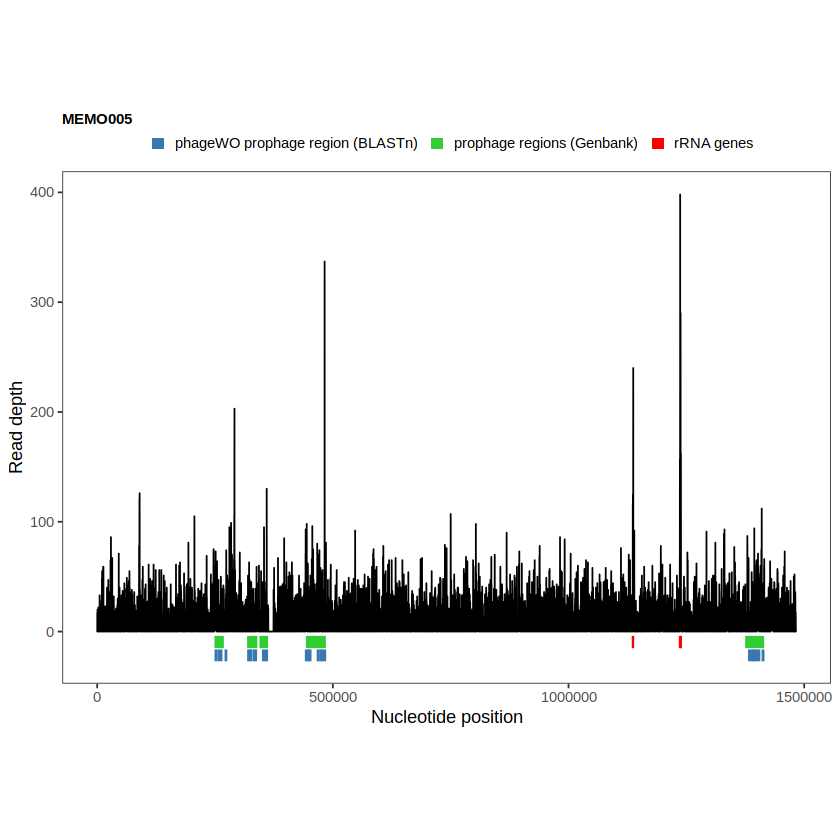

In [22]:
covplot

In [ ]:
covplot <- ggplot(df_merged, aes_string(x = "pos", y=names(df_merged[3])))+
  geom_line()+
  geom_rect(data = phageblast, inherit.aes=FALSE, aes(xmin=V9, xmax=V10, ymin=-max(df_merged[3])*0.066, ymax=-max(df_merged[3])*0.043,
                                                      fill="#3977AF", color="#3977AF"), alpha=1)+
  geom_rect(data = rRNA, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_merged[3])*0.036, ymax=-max(df_merged[3])*0.012,
                                                      fill="red", color="red"), alpha=1)+
  geom_rect(data = prophage, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-max(df_merged[3])*0.036, ymax=-max(df_merged[3])*0.012,
                                                      fill="limegreen", color="limegreen"), alpha=1)+
  labs(x="Nucleotide position", y="Read depth")+
  ggtitle(args[1])+
  scale_fill_identity(name = "",
                      breaks = c("#3977AF", "limegreen", "red"),
                      labels = c("phageWO prophage region (BLASTn)", "prophage regions (Genbank)", "rRNA genes"),
                      guide = "legend")+
  scale_color_identity(name = "",
                      #breaks = c("#3977AF", "red"),
                      #labels = c("phageWO prophage region", "rRNA genes"),
                      guide = "none",#"legend"
                      )+
  theme_bw()+
  theme(legend.position = "top", 
        legend.background=element_rect(fill=NA, color=NA),
        legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit='cm'),
        legend.key.size = unit(3, 'mm'),
        plot.title = element_text(size=9, face="bold"),
        #panel.grid.major = element_line(size = .25),
        panel.grid=element_blank())+
  guides(fill = guide_legend(override.aes = list(alpha = 1)))

ggsave(paste0(args[1],"-covplot.pdf"), covplot, dpi=300, width = 7.5, height=5)